### Assignment 6.2b
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset

-- This time includes dropout and data-augmentation. 

-- Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory.

In [1]:
import json
from pathlib import Path
import os

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')

print(current_dir)
print(results_dir)

c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06
c:\Users\saman\git_repos\dsc650\dsc650\assignments\assignment06\results


In [1]:
# loading the required libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## Data
Here we are using the CIFAR10 small images dataset to classify the images.

This is a dataset of 50,000 32X32 color training images and 10,000 test images labeled over 10 categories.

In [3]:
# loading the CIFAR10 dataset and create the training and test arrays
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Checking the shape of the second image from the training set
X_train[1].shape

(32, 32, 3)

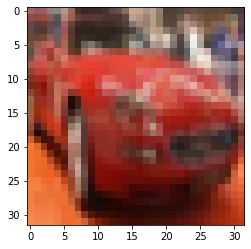

In [4]:
plt.imshow(X_train[5])
plt.show()

### Data Preparation

In [5]:
X_train.shape


(50000, 32, 32, 3)

In [6]:
# Data preparation is required before training the model
# Lines 1 and 2 reshapes the inputs
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3)).astype('float32')

# Lines 3 and 4 
# Normalization of the input values (image pixels) from 0 and 255 to 0.1
X_train = X_train / 255
X_test = X_test / 255

# Lines 5 and 6 
# one-hot encoding of the target variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print(X_train.shape); print(X_test.shape); print(num_classes)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
10


In [2]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


### Building the model

In [21]:
def cnn_model():
	# function to create the CNN model
	# Create model
	model = Sequential()  #model type is sequetial
	# Addng layers to the model
	# First layer is Conv2D as the input images are 2-dimensional matrices
	# 32 nodes with a kernel size of 5
	# Rectified Linear Activation ReLu is most widely used. It makes the network sparse and efficient 
	model.add(Conv2D(64, (5, 5), input_shape=(32, 32, 3), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D(2,2))

	model.add(Conv2D(128, (5, 5), activation='relu'))
	# Adding the pooling layer
	model.add(MaxPooling2D(2,2))
	# Flatten layer converts the 2D matrix data to a vector
	model.add(Flatten())
	# Fully connected dense layer with 128 neurons
	model.add(Dense(512, activation='relu'))
	# output layer which has 10 neurons for the 10 classes
	model.add(Dense(num_classes, activation='softmax'))
	
	return model


model = cnn_model()


In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

### We see from the summary report that our input (5, 5, 128) outputs were flattened into vectors of shape (3200,), before going through two Dense layers.

In [23]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


### Fitting and Evaluating the model

In [24]:
# Considering 5 epochs and a batch size of 150
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100)
# evaluating the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 86s 2ms/step - loss: 1.7040 - accuracy: 0.4035 - val_loss: 1.2678 - val_accuracy: 0.5583
Epoch 2/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.1784 - accuracy: 0.5906 - val_loss: 1.0638 - val_accuracy: 0.6313
Epoch 3/30
50000/50000 [==============================] - 88s 2ms/step - loss: 0.9569 - accuracy: 0.6711 - val_loss: 0.9790 - val_accuracy: 0.6654
Epoch 4/30
50000/50000 [==============================] - 89s 2ms/step - loss: 0.7816 - accuracy: 0.7316 - val_loss: 0.8860 - val_accuracy: 0.7015
Epoch 5/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.6366 - accuracy: 0.7821 - val_loss: 0.9889 - val_accuracy: 0.6807
Epoch 6/30
50000/50000 [==============================] - 99s 2ms/step - loss: 0.5033 - accuracy: 0.8269 - val_loss: 0.9743 - val_accuracy: 0.7067
Epoch 7/30
50000/50000 [==============================] - 101s 2ms/s

#### The above output shows that with only five epochs we have achieved accuracy of 98.73% on our validation data set.

In [25]:
# saving the model
model.save(f'{results_dir}\\assignment_6.2a_cifar10.h5')


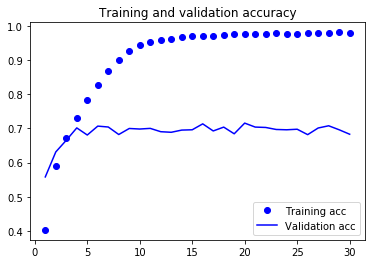

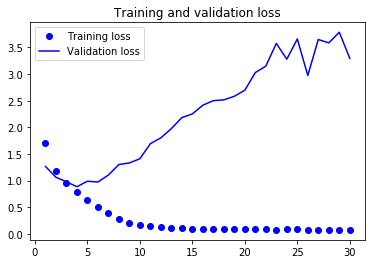

In [26]:
# Plotting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### These plots are characteristics of overfitting. The training accuracy increases until it reaches 100% whereas the validation accuracy stalls a little above 99%.
#### The validation loss reaches its minimum around 3 epochs and then stays almost the same, whereas the training loss keeps decreasing until it reaches nearly 0